# Programming in Python Final Project
### Authors: 
- Yifan Zhang (YZ2831)  
- Jingying Zhou (JZ2673)

# Part I. 100 LYRICS  
## 1.1 Data Scraping

In [ ]:
#Import modules
import os.path
import requests
import urllib.request
import collections
import re
import bs4
import lxml

#Change work directory
os.chdir('/Users/zhangyifan/desktop/pythonproject')

#Define a function of download webpages 
def download_file(link, name):
    if os.path.isfile(name):
        return
    file = open(name, 'w')
    r = requests.get(link)
    file.write(r.text)
    file.close()
    
#There are 10 categories 
category = ['pop', 'rock', 'hiphop', 'metal', 'electronic', 'rb', 'jazz', 'country', 'folk', 'indie']

#Scraping and Extracting data loop For each category
from bs4 import BeautifulSoup
for item in category:
    url = 'http://www.metrolyrics.com/top100-'+ item + '.html'
    
    #Scrape 100 links from each music category
    nf2 = urllib.request.urlopen(url)
    sp = BeautifulSoup(nf2, 'lxml', from_encoding='utf-8')
    speech1 = sp.findAll('a',{"class":["song-link hasvidtoplyric","song-link"]})
    speech2 = sp.findAll('a',{"class":["title","title hasvidtoplyriclist"]})
    song_part1 = [ele1.get('href') for ele1 in speech1]
    song_part2 = [ele2.get('href') for ele2 in speech2]
    linkset = song_part1 + song_part2
    
    #This part is for check the link_set size
    print(len(linkset))
    print("\n".join(linkset[:5]))
    
    #Save 100 webpages of each category locally
    for i, link in enumerate(linkset):
        if i % 20 == 0:
            print("Done with %d.." % i)
        download_file(link, item + "%d.html" % i)
    
    #Obtain lyric_set for 100 songs
    lyricset = []
    for i in range(100):
        with open("{}{}.html".format(item, i)) as fin:
            spi = BeautifulSoup(fin, 'lxml', from_encoding='utf-8')
        li = spi.findAll('p',{"class":"verse"})
        lyrici = [item.getText().replace('\n',' ') for item in li]
        j =''
        for ele in lyrici:
            j += ' ' + ele
        lyricset.append(j)

    #Check for the lyricset size
    len(lyricset)
    
    #Extract the data
    with open(item + '_100lyr.txt','w') as fd:
        for i in lyricset:
            fd.write(i+'\n')
            
    #Check for the txt file
    with open(item + '_100lyr.txt','r') as f:
        tt = f.readlines()
        len(tt)

## 1.2 Cleaning & Preprocessing

In [1]:
import os
import nltk
import wordcloud
import gensim
import stop_words
import string
import pandas as pd
import matplotlib.pyplot as plt
from os import path
from scipy.misc import imread
from stop_words import get_stop_words
from wordcloud import WordCloud, STOPWORDS

//anaconda/lib/python3.5/site-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


In [3]:
"""
Prepare lyrics data to facilitate future analysis 
"""
# Full_lyr: a list of 1,000 str, each represents a song lyric
def read_lyr(filename):
    return open(filename,'r').readlines()

full_lyr = []
for i in os.listdir('./metro_lyrics'):
    full_lyr.extend(read_lyr('./metro_lyrics/'+i))
    
# flat_lyr: a single string of all lyrics 
flat_lyr = ''
for i in full_lyr:
    flat_lyr+=i.replace('\n','')

(-0.5, 399.5, 199.5, -0.5)

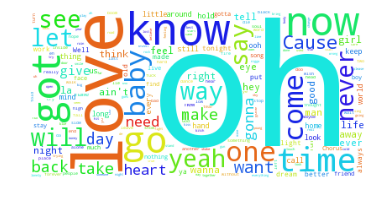

In [51]:
"""
Preliminary Word Cloud Just For Fun!
"""
wordcloud = WordCloud(background_color="white",stopwords=STOPWORDS).generate(flat_lyr)
plt.imshow(wordcloud)
plt.axis("off")

### Stop-word removal, word stemming  
We did stop-word removal and word stemming to remove the "noise" of vocabs. This ensures that the lyrics we are investigating are actually meaningful.

In [8]:
from nltk.stem.porter import PorterStemmer
p_stemmer = PorterStemmer()
en_stop = get_stop_words('en')

texts_full = []
for doc in full_lyr:
    tokens = [word.strip(string.punctuation) for word in doc.lower().replace('\n','').split(" ")]
    stopped_tokens = [i for i in tokens if not i in en_stop+[' ','']]
    text = [p_stemmer.stem(i) for i in stopped_tokens]
    texts_full.append(text[1:])

## 1.3 Data Analysis
### Question 1. Song length and Vocabulary Diversity

In [10]:
"""
'flatten' to group lyrics according to genre
"""
def flatten(ip):
    if ip == []:
        return ip
    if isinstance(ip[0],list):
        return flatten(ip[0]) + flatten(ip[1:])
    else:
        return ip[:1] + flatten(ip[1:])
        
# texts_flattend: a list of length 10; each for a type; represents lyrics for the 100 songs 
texts_flattened = []
for i in range(10):
    texts_flattened.append(flatten(texts_full[100*i:100*(i+1)]))

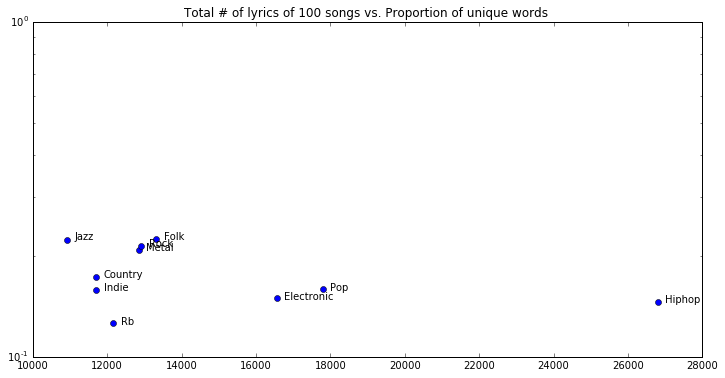

In [104]:
names = [nm.split('_')[0] for nm in os.listdir('./metro_lyrics')]
st_len = [len(ly) for ly in texts_flattened]
u_len =[len(set(ly)) for ly in texts_flattened]
prop = [u_len[i]/st_len[i] for i in range(10)]

# Plot the total words vs. total distinct words
%matplotlib inline  

plt.figure(figsize=(12,6))
plt.semilogy(st_len, prop, 'o')
for i, txt in enumerate(names):
    plt.annotate(txt.capitalize(), (st_len[i]+200,prop[i]-0.001))
plt.title('Total # of lyrics of 100 songs vs. Proportion of unique words ')

#### Conclusion
- Of all song types, hiphop stands out because of it's LONG lyrics. However, the proportion of unique words is among the lowest.
- Jazz, on the other hand, has shorter lyrics but highest number of unique words used.  
- R&B has both short lyrics and low unique words proportions
- **Rock and Metal are pretty close!**

### Question 2. A First Impression of What the Lyrics are About: Word Cloud

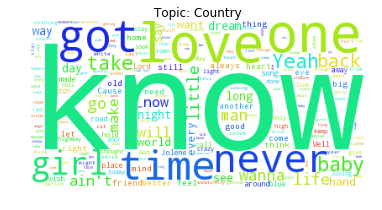

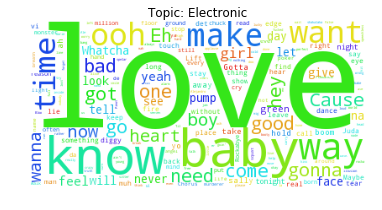

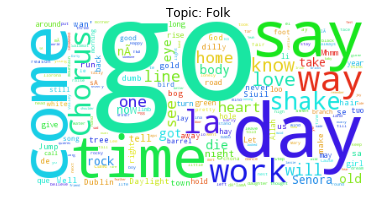

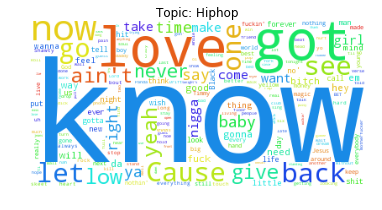

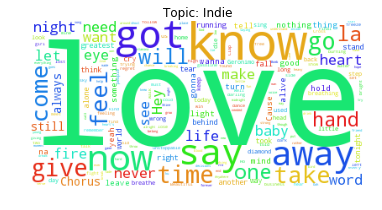

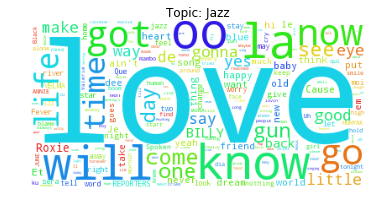

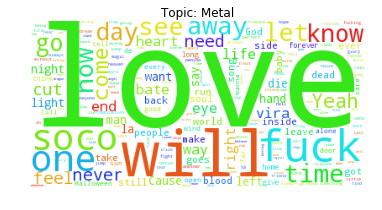

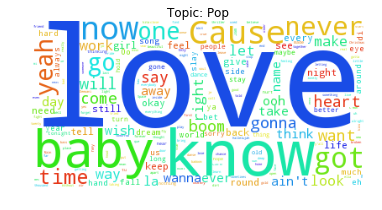

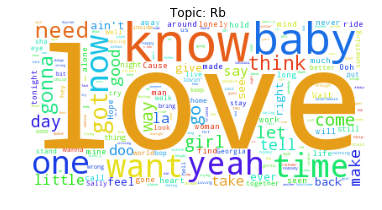

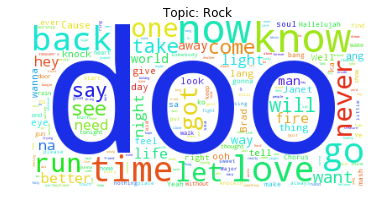

In [82]:
llll = []
for i in range(10):
    lll = ''
    for ll in full_lyr[i*100:(i+1)*100]: 
        lll += ll
    llll.append(lll)

%matplotlib inline 
plt.ion() # Enable iterative plotting
for i in range(10):
    wordcloud = WordCloud(background_color="white",stopwords=STOPWORDS).generate(llll[i])
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title('Topic: {}'.format(names[i].capitalize()))
    plt.show()
    plt.pause(0.0001)

### Now we look at only the top 15 words used by different genres

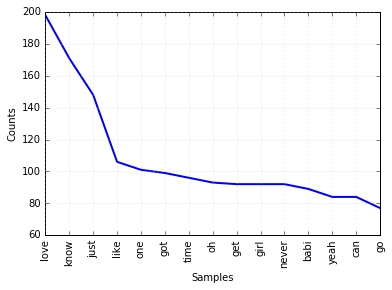

[('love', 198), ('know', 171), ('just', 148), ('like', 106), ('one', 101), ('got', 99), ('time', 96), ('oh', 93), ('get', 92), ('girl', 92), ('never', 92), ('babi', 89), ('yeah', 84), ('can', 84), ('go', 77)]


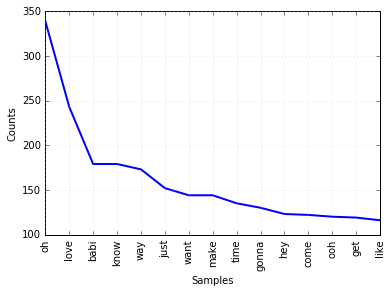

[('oh', 339), ('love', 243), ('babi', 179), ('know', 179), ('way', 173), ('just', 152), ('want', 144), ('make', 144), ('time', 135), ('gonna', 130), ('hey', 123), ('come', 122), ('ooh', 120), ('get', 119), ('like', 116)]


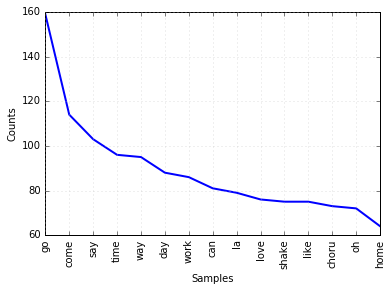

[('go', 159), ('come', 114), ('say', 103), ('time', 96), ('way', 95), ('day', 88), ('work', 86), ('can', 81), ('la', 79), ('love', 76), ('shake', 75), ('like', 75), ('choru', 73), ('oh', 72), ('home', 64)]


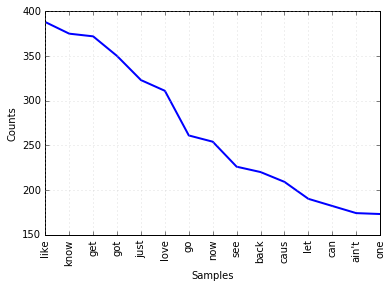

[('like', 388), ('know', 375), ('get', 372), ('got', 350), ('just', 323), ('love', 311), ('go', 261), ('now', 254), ('see', 226), ('back', 220), ('caus', 209), ('let', 190), ('can', 182), ("ain't", 174), ('one', 173)]


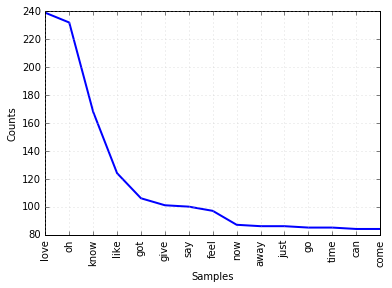

[('love', 239), ('oh', 232), ('know', 168), ('like', 124), ('got', 106), ('give', 101), ('say', 100), ('feel', 97), ('now', 87), ('away', 86), ('just', 86), ('go', 85), ('time', 85), ('can', 84), ('come', 84)]


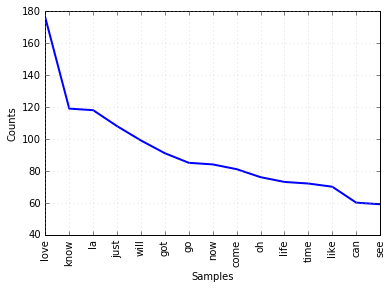

[('love', 176), ('know', 119), ('la', 118), ('just', 108), ('will', 99), ('got', 91), ('go', 85), ('now', 84), ('come', 81), ('oh', 76), ('life', 73), ('time', 72), ('like', 70), ('can', 60), ('see', 59)]


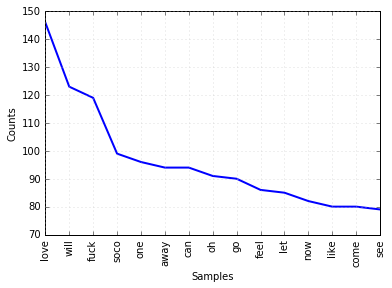

[('love', 146), ('will', 123), ('fuck', 119), ('soco', 99), ('one', 96), ('away', 94), ('can', 94), ('oh', 91), ('go', 90), ('feel', 86), ('let', 85), ('now', 82), ('like', 80), ('come', 80), ('see', 79)]


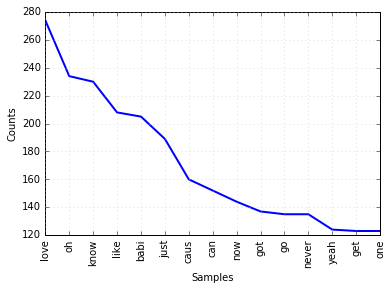

[('love', 274), ('oh', 234), ('know', 230), ('like', 208), ('babi', 205), ('just', 189), ('caus', 160), ('can', 152), ('now', 144), ('got', 137), ('go', 135), ('never', 135), ('yeah', 124), ('get', 123), ('one', 123)]


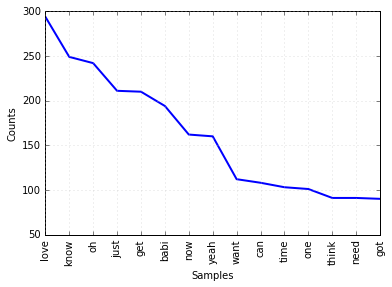

[('love', 294), ('know', 249), ('oh', 242), ('just', 211), ('get', 210), ('babi', 194), ('now', 162), ('yeah', 160), ('want', 112), ('can', 108), ('time', 103), ('one', 101), ('think', 91), ('need', 91), ('got', 90)]


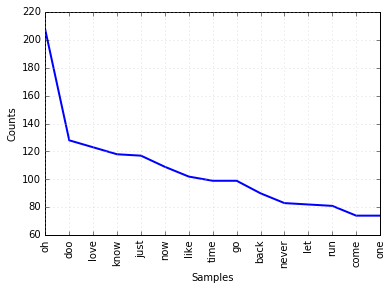

[('oh', 207), ('doo', 128), ('love', 123), ('know', 118), ('just', 117), ('now', 109), ('like', 102), ('time', 99), ('go', 99), ('back', 90), ('never', 83), ('let', 82), ('run', 81), ('come', 74), ('one', 74)]


In [113]:
# Print lyrics length vs Unique words
    
def get_top_words(ls_song,wordn):
    fd = nltk.FreqDist(ls_song)
    %matplotlib inline
    fd.plot(15, cumulative=False)
    return fd.most_common(wordn)
for i in texts_flattened:
    print(get_top_words(i,15))

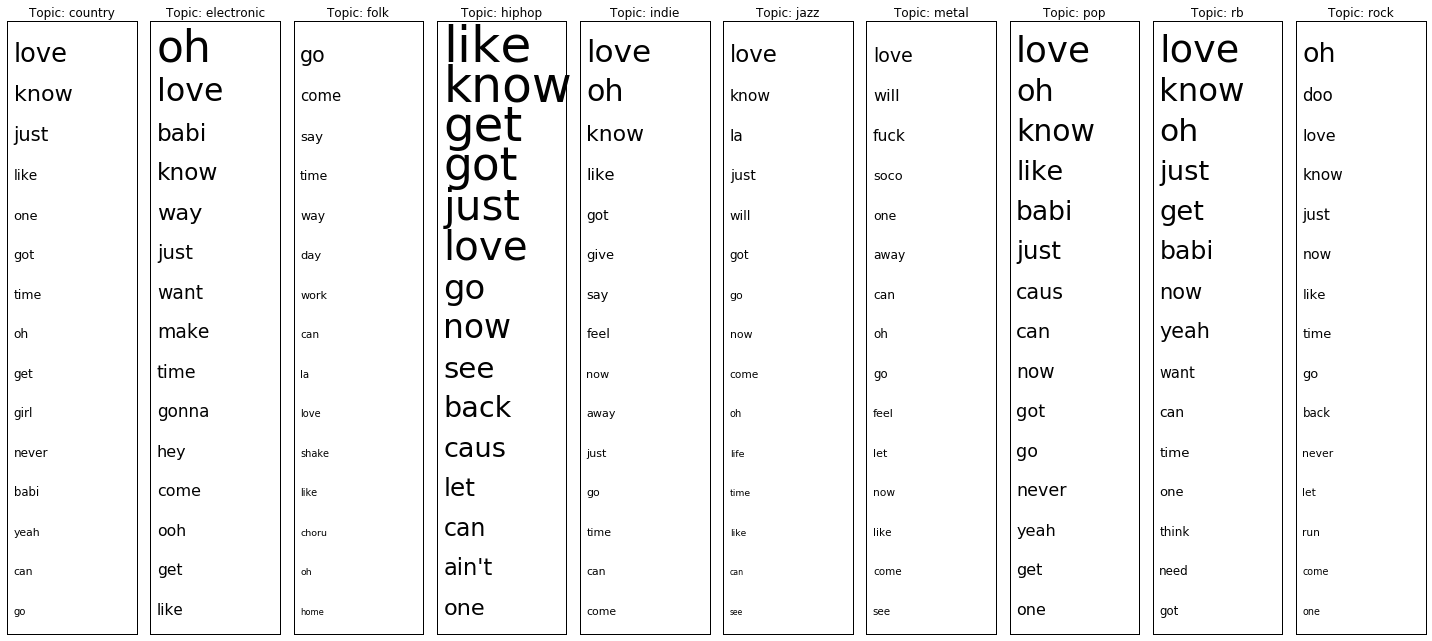

In [18]:
plt.figure(figsize=(20,9))
for i in range(10):   
    num_top_words = 15
    fd = nltk.FreqDist(texts_flattened[i])
    plt.subplot(1, 10, i + 1) 
    plt.ylim(0, 15 + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic: {}'.format(names[i]))    
    for i,(word, share) in enumerate(fd.most_common(15)):
        plt.text(0.05, 15-i-0.5, word, fontsize= 0.13*share)
plt.tight_layout()
plt.show()

**Conclusion**  
- **Love is like the universal theme of all songs.** Suprisingly (or not), folk music ranks "love" the lowest compared with other genres

## Question 3: Topic Modelling the 1,000 songs

In [21]:
from gensim import corpora, models
dictionary = corpora.Dictionary(texts_full)
corpus = [dictionary.doc2bow(text) for text in texts_full]
# Build topic model
lyr_ldamodel_5 = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word = dictionary, passes=20)
# Print topics and top 30 words
lyr_ldamodel_5.print_topics(num_topics=5,num_words =30)

[(0,
  '0.015*"la" + 0.010*"na" + 0.009*"love" + 0.008*"boom" + 0.007*"da" + 0.007*"like" + 0.007*"got" + 0.007*"get" + 0.007*"babi" + 0.005*"want" + 0.004*"cri" + 0.004*"just" + 0.004*"oh" + 0.004*"back" + 0.004*"round" + 0.004*"de" + 0.004*"ang" + 0.004*"je" + 0.004*"call" + 0.003*"come" + 0.003*"right" + 0.003*"man" + 0.003*"le" + 0.003*"sa" + 0.003*"know" + 0.003*"et" + 0.003*"now" + 0.003*"give" + 0.002*"ko" + 0.002*"ain\'t"'),
 (1,
  '0.013*"doo" + 0.007*"work" + 0.007*"soco" + 0.006*"que" + 0.006*"y" + 0.005*"la" + 0.005*"de" + 0.005*"yo" + 0.004*"gun" + 0.004*"see" + 0.004*"ya" + 0.004*"se" + 0.004*"bate" + 0.004*"vira" + 0.004*"tu" + 0.004*"get" + 0.004*"bitch" + 0.003*"way" + 0.003*"billi" + 0.003*"tell" + 0.003*"ass" + 0.003*"die" + 0.003*"seen" + 0.003*"ti" + 0.003*"skeet" + 0.003*"edg" + 0.003*"come" + 0.003*"el" + 0.003*"det" + 0.003*"ye"'),
 (2,
  '0.011*"like" + 0.007*"day" + 0.007*"run" + 0.007*"come" + 0.006*"know" + 0.006*"get" + 0.006*"ooh" + 0.006*"away" + 0.005*"m

In [22]:
def tpm(ls_txt,n_topic):
    dictionary = corpora.Dictionary(ls_txt)
    corpus = [dictionary.doc2bow(text) for text in ls_txt]
    lyr_ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=n_topic, id2word = dictionary, passes=20)
    return lyr_ldamodel
def print_tpc(model):
    top_words = [[_ for _, word in model.show_topic(topicno, topn=15)] for topicno in range(model.num_topics)]
    i = 1
    for t in top_words:
        print('Topic',i, ", ".join(str(x) for x in t))
        i += 1

In [106]:
lyr_5 = tpm(texts_full,5)
print_tpc(lyr_5)

Topic 1 come, will, day, know, one, go, god, make, can, let, heart, say, world, like, old
Topic 2 love, just, know, got, now, like, go, can, get, never, one, give, oh, away, feel
Topic 3 la, ya, get, fuck, good, de, time, like, y, got, hey, que, yeah, back, gonna
Topic 4 oh, know, just, like, babi, way, get, love, yeah, girl, time, got, now, think, take
Topic 5 na, want, go, love, babi, run, know, time, just, danc, need, da, work, di, like


In [107]:
lyr_10 = tpm(texts_full,10)
print_tpc(lyr_10)

Topic 1 like, get, just, back, now, life, love, see, wish, away, know, want, name, call, good
Topic 2 go, will, let, oh, give, take, work, gonna, know, can, da, now, got, way, see
Topic 3 want, oh, got, way, one, away, babi, get, look, heart, love, fire, hallelujah, good, know
Topic 4 love, know, just, babi, oh, now, time, can, feel, like, go, caus, get, need, one
Topic 5 oh, doo, go, time, day, come, na, say, sing, work, song, tell, line, shake, home
Topic 6 ooh, oh, magic, night, get, gonna, good, ride, diggi, hand, light, got, like, come, wanna
Topic 7 fuck, yeah, babi, know, get, got, just, littl, take, better, ain't, eye, bitch, salli, need
Topic 8 eh, gonna, hey, come, get, bad, boy, like, time, man, whatcha, fire, one, miss, det
Topic 9 will, now, low, can, like, got, hey, dream, get, never, come, know, new, eye, oh
Topic 10 la, de, que, y, soco, le, pump, je, se, bate, et, vira, yo, en, ya


**Conclusion:  
We do observe lyric clusters!**  
However we did realize that our lyric size (1,000) is too small. So we proceeded on to download a large, publicly available dataset: **MusiXMatch Dataset**

# Part II. MusicXMatch Dataset

## 2.1 Preparing Data

In [34]:
with open('testcopy.txt') as f:
    data = f.readlines()
ids = []
dct = []
for s in data[1:]:
    lyc = s.replace(':',',').replace('\n','').split(',')[2:]
    dct_t = dict(zip([int(x) for x in lyc[::2]], [int(y) for y in lyc[1::2]]))
    dct.append(dct_t)
    ids.append(s.replace(':',',').split(',')[0])
    
print('Total Number of Songs: ',len(dct))

# keys: intergers 1-5000
# vals: corresponding words
dictionary = dict(zip(range(1,5001),data[0].replace('%','').split(',') ))

# Remove stop words
en_stop = get_stop_words('en')

# Remove stop words from lyrics
rm = [k for k,v in dictionary.items() if v in en_stop]
for d in dct: 
    list(map(lambda x: d.pop(x,None), rm))
    
# Remove stop words from dictionary
list(map(lambda x: dictionary.pop(x,None), rm))
print('Stop words removed!')

# Get Corpus!
corpus = [list(d.items()) for d in dct]

## 2.2  The 27,143 Lyrics vs 12 Topics

In [40]:
%time ldamodel_12 = gensim.models.ldamodel.LdaModel(corpus, num_topics = 12,id2word = dictionary,passes = 20)
ldamodel_12.print_topics(num_topics=12,num_words =20)

CPU times: user 11min 14s, sys: 5.38 s, total: 11min 20s
Wall time: 11min 38s


[(0,
  '0.126*"oh" + 0.083*"yeah" + 0.075*"babi" + 0.045*"gonna" + 0.037*"girl" + 0.033*"let" + 0.033*"hey" + 0.032*"come" + 0.031*"go" + 0.021*"ooh" + 0.016*"tonight" + 0.016*"ah" + 0.015*"night" + 0.014*"got" + 0.014*"right" + 0.013*"know" + 0.013*"danc" + 0.013*"good" + 0.013*"alright" + 0.012*"get"'),
 (1,
  '0.105*"na" + 0.086*"da" + 0.064*"o" + 0.046*"ha" + 0.034*"u" + 0.028*"lyric" + 0.027*"2" + 0.025*"round" + 0.022*"ho" + 0.021*"ladi" + 0.021*"bye" + 0.019*"&" + 0.018*"ba" + 0.017*"1" + 0.015*"ni" + 0.014*"b" + 0.013*"chorus" + 0.013*"–" + 0.011*"i’m" + 0.010*"wat"'),
 (2,
  '0.050*"la" + 0.030*"e" + 0.027*"de" + 0.020*"le" + 0.020*"un" + 0.020*"che" + 0.017*"il" + 0.016*"non" + 0.015*"et" + 0.014*"di" + 0.014*"les" + 0.012*"je" + 0.012*"que" + 0.012*"ma" + 0.011*"tu" + 0.011*"se" + 0.011*"pas" + 0.010*"qui" + 0.009*"dan" + 0.009*"si"'),
 (3,
  '0.096*"love" + 0.031*"want" + 0.029*"know" + 0.024*"can" + 0.022*"need" + 0.022*"feel" + 0.021*"just" + 0.019*"one" + 0.018*"make" + 

In [108]:
print_tpc(ldamodel_12)

Topic 1 oh, yeah, babi, gonna, girl, let, hey, come, go, ooh, tonight, ah, night, got, right
Topic 2 na, da, o, ha, u, lyric, 2, round, ho, ladi, bye, &, ba, 1, ni
Topic 3 la, e, de, le, un, che, il, non, et, di, les, je, que, ma, tu
Topic 4 love, want, know, can, need, feel, just, one, make, heart, like, give, will, wanna, onli
Topic 5 dead, will, live, die, god, life, kill, blood, one, death, world, us, hate, hell, war
Topic 6 en, ik, ja, de, je, het, ei, dat, een, niet, van, se, dan, kun, maar
Topic 7 will, come, light, eye, dream, heart, night, see, sun, fall, sky, world, like, day, away
Topic 8 que, de, y, la, el, en, te, mi, tu, un, se, es, por, lo, yo
Topic 9 ich, und, die, du, der, nicht, das, ist, es, ein, zu, dich, den, mir, wir
Topic 10 will, know, time, just, now, never, go, ca, see, say, can, way, get, away, think
Topic 11 get, like, got, ya, know, nigga, now, back, caus, shit, just, can, yo, em, wanna
Topic 12 well, littl, man, said, home, day, got, old, like, just, song,

## Findings: Well I guess the topics are....

Topic 1 : Love song I guess? 'hey' 'babi' 'girl' 'let's' 'go' 'home' 'tonight'  
Topic 2 : Modals and other small pieces  
Topic 3 : French songs  
Topic 4 : Plain love songs  
Topic 5 : Heavy metal I guess! For it talks about faith, blood, death, and hell   
Topic 6 : Words picked up probably from other languages  
Topic 7 : Folk music probably? All about beauty of life and sceneries  
Topic 8 : Spanish words.  
Topic 9 : Songs in german  
Topic 10 : Say, think, know, now, never...  
Topic 11 : Hip-hop? Swear words.  
Topic 12 : Narrative things. Folk?  

## 2.3 The 27,143 Lyrics vs 15 Topics
### We increased the number of topics as 15 to see how the result would change.   
### Conclusion In a Nutshell:  
- As the number of topics increases, we have a more precise idea of what each topic is about 
- However, we might end up with multiple topics that describes similar things

In [44]:
%time ldamodel_15 = gensim.models.ldamodel.LdaModel(corpus, num_topics = 15,id2word = dictionary,passes = 20)
ldamodel_15.print_topics(num_topics=15,num_words =20)

CPU times: user 11min 13s, sys: 5.93 s, total: 11min 19s
Wall time: 11min 33s


[(0,
  '0.040*"will" + 0.021*"come" + 0.019*"night" + 0.019*"day" + 0.016*"light" + 0.015*"sun" + 0.014*"dream" + 0.014*"sing" + 0.012*"away" + 0.012*"sky" + 0.010*"rain" + 0.009*"shine" + 0.009*"star" + 0.009*"like" + 0.009*"see" + 0.009*"fli" + 0.008*"eye" + 0.007*"home" + 0.007*"song" + 0.007*"fall"'),
 (1,
  '0.049*"danc" + 0.035*"shake" + 0.033*"rock" + 0.027*"music" + 0.026*"play" + 0.025*"move" + 0.024*"s" + 0.022*"t" + 0.021*"im" + 0.020*"song" + 0.019*"beat" + 0.018*"roll" + 0.016*"m" + 0.014*"readi" + 0.013*"sound" + 0.012*"dont" + 0.011*"&" + 0.011*"turn" + 0.010*"night" + 0.009*"re"'),
 (2,
  '0.065*"que" + 0.046*"de" + 0.043*"y" + 0.036*"la" + 0.032*"el" + 0.024*"en" + 0.022*"te" + 0.019*"mi" + 0.018*"tu" + 0.017*"un" + 0.015*"se" + 0.015*"es" + 0.014*"lo" + 0.014*"yo" + 0.013*"por" + 0.011*"con" + 0.010*"si" + 0.009*"los" + 0.009*"como" + 0.008*"una"'),
 (3,
  '0.028*"will" + 0.023*"know" + 0.020*"just" + 0.018*"time" + 0.016*"never" + 0.016*"can" + 0.015*"now" + 0.014*"c

In [109]:
print_tpc(ldamodel_15)

Topic 1 will, come, night, day, light, sun, dream, sing, away, sky, rain, shine, star, like, see
Topic 2 danc, shake, rock, music, play, move, s, t, im, song, beat, roll, m, readi, sound
Topic 3 que, de, y, la, el, en, te, mi, tu, un, se, es, lo, yo, por
Topic 4 will, know, just, time, never, can, now, ca, see, say, way, feel, go, think, one
Topic 5 oh, yeah, go, let, get, gonna, wanna, know, come, hey, got, gotta, can, make, right
Topic 6 o, na, da, que, de, e, eu, é, não, um, se, ba, pra, você, em
Topic 7 de, ich, la, und, le, et, les, du, die, je, un, pas, que, des, der
Topic 8 babi, girl, got, littl, well, good, boy, just, know, said, now, tell, man, home, say
Topic 9 la, ja, en, jag, och, du, lyric, ei, det, dig, på, se, som, är, bounc
Topic 10 e, che, non, di, la, un, il, ma, mi, per, se, è, come, io, si
Topic 11 will, die, god, life, burn, soul, dead, blood, eye, fire, death, world, live, now, lie
Topic 12 ik, je, de, en, het, dat, een, van, niet, dan, al, bang, maar, thou, te
T

Topic 1 : Sceneries  
Topic 2 : Describing music  
Topic 3 : Spanish  
Topic 4 : On thinking, seeing and feeling  
Topic 5 : Modals  
Topic 6 : A mix of words probably picked up in other languages (spanish probably?)  
Topic 7 : A mix of frech and german  
Topic 8 : Plain love song: baby, girls and boys  
Topic 9 : A mix of words probably picked up in other languages (spanish probably?)  
Topic 10 : A mix of words probably picked up in other languages (spanish probably?)  
Topic 11 : Heavy metal  
Topic 12 : A mix of words probably picked up in other languages  
Topic 13 : Hip-hop and swearing words  
Topic 14 : Life and man.. Folk probably  
Topic 15 : Plain love songs  

**Conclusion: **  
- With more lyrics, we see clearer separations of different topics.  
- Language differences are easy to spot: songs written in german, spanish and french stand out  
- Other topics we discovered are: god and faith, rap songs (dirty words), plain love songs...